In [1]:
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
sys.path.insert(0,'../ift6758')

from data import get_player_stats


In [2]:
# Get data
DataFrameAll = get_player_stats(2017, 'goalies')

Retrieving data from 'https://www.hockey-reference.com/leagues/NHL_2017_goalies.html'...


In [3]:

def Save_DataFrame(Data,FileName:str="GoalieData",DirFd:str="data/WarmUp"):
    # Save the data frame in csv format, create directories if they do not exist
    
    if os.path.isdir(DirFd) == 0:
        os.makedirs(DirFd)
        print("Created Directry")
    if os.path.isfile(f"{DirFd}/{FileName}") == 0:
        Data.to_csv(f"{DirFd}/{FileName}")
    else:
        return print("File exist")
    return print("Data saved")
        

Save_DataFrame(DataFrameAll)

Created Directry
Data saved


In [4]:
def Splice_DataFrame(DataFrameLarge, Col=["SV%"]):
    # Reduce the size of the data frame by keeping the selected columns
    DataFrameSmall = DataFrameLarge[Col]   
    return DataFrameSmall



DataFrameFilt = Splice_DataFrame(DataFrameAll,['Player','GP','GA','SA','SV%','MIN'])

In [5]:
DataFrameFilt.sort_values("SV%", ascending=False)

,Player,GP,GA,SA,SV%,MIN
63,Alex Nedeljkovic,1,0,17,1.000,30
85,Dustin Tokarski,1,0,5,1.000,10
11,Jack Campbell,1,0,5,1.000,20
29,Kristers Gudlevskis,1,0,3,1.000,11
26,Jon Gillies,1,1,28,.964,60
...,...,...,...,...,...,...
32,Andrew Hammond,6,14,86,.837,206
13,Pheonix Copley,1,5,29,.828,59
83,Malcolm Subban,1,3,16,.813,31
19,Chris Driedger,1,4,15,.733,40


In [6]:
def RemoveLowMinPlayers(DataFrame,Min):
    # Remove players with less than 300 minutes game time.
    DataFrame = DataFrame.loc[(pd.to_numeric(DataFrame["MIN"])>Min)]    
    return DataFrame

NewDataFrame = RemoveLowMinPlayers(DataFrameFilt,300)

Save plot as data/WarmUp/Goalie Performance Ranking.jpg


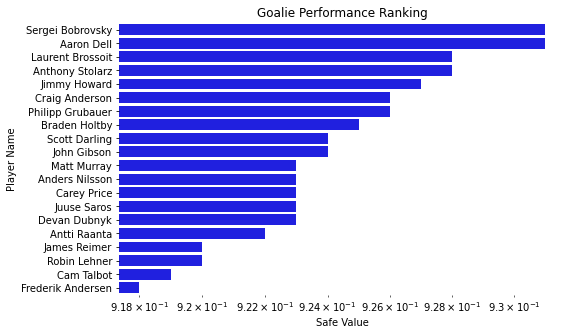

In [7]:
def PlotBar(DataFrame, Row:str="SV%", Col:str="Player", Count:int=20, xlab:str="Safe Value",ylab:str="Player Name",Tit:str="Goalie Performance Ranking", DirFd:str="data/WarmUp"):
    # Plot two of the data frame columns on a horizontal bar chart, descending sort automatically
    
    Plot_Data = DataFrame[[Col,Row]].sort_values(Row, ascending=False)
    Plot_Data[Row] = Plot_Data[Row].astype('float')
    #Plot_Data[[Col]] = pd.to_numeric(Plot_Data[Col])
    #Plot_Data[[Row]] = pd.to_numeric(Plot_Data[Row])
    
    f, ax = plt.subplots(figsize=(8, 5))

    sns.barplot(x=Row, y=Col, data=Plot_Data[0:Count],
                color="b")

    sns.despine(left=True, bottom=True)
    ax.set(title=Tit,ylabel=ylab,
           xlabel=xlab,xscale ="log")
    
    print('Save plot as ' + DirFd+"/"+Tit+'.jpg')
    plt.savefig(DirFd+"/"+Tit+'.jpg', bbox_inches = "tight")
    
    return None


PlotBar(NewDataFrame)